# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual(Ankita Gupta)


# **Project Summary -**

Yes bank is a well known bank in India which provide wide range of services and solutions right from bank accounts, deposits, cards, cash management, privilege banking, trade finance, Non-Resident India(NRI) banking, institutional banking, merchant acquiring, digital banking and agricultural banking solutions. As the data is all about stock price so, In this project I will analysing the patterns of dataset by performing Exploratory Data Analysis and try to build a model with the help of Machine Learning for predicting the closing stock price.

The tools for data analysis and model building used in the project are the packages from the python library such as Numpy and Pandas, Matplotlib,Seaborn, Linear regression, Lasso, Ridge, ElasticNet, MinMaxScalar etc.

# **GitHub Link -**

https://github.com/ankitagupta010/Yes_bank_stock_closing_price

# **Problem Statement**


**The given dataset contains stock price information in the various columns by monthly date. There are 5 columns in the dataset such as Date, Open, High, Low, Close. Our target variable is closing price column which we will try to predict for future. So first we will perform for some Explorartory Data Analysis to the data to find out some patterns as well as to see the relation between the various column and the target variable column. Then we will be building the model through which we will be able to predict or provide a decent estimate of the closing price which is our target variable.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import plotly.express as px


### Dataset Loading

In [2]:
# Load Dataset
YB = ('/content/data_YesBank_StockPrices.csv')
YB_df = pd.read_csv(YB)

### Dataset First View

In [3]:
# Dataset First Look
YB_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [4]:
YB_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
YB_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
YB_df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
YB_df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
YB_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**There are no missing values in this dataset.**

### What did you know about your dataset?

The dataset contain 185 rows and 5 columns with different variable types. There are no missing values as well as duplicate values in the dataset. There are two types of information inside the columns as float and object.

Basically the given dataset is providing us the overview of the stock price details information and by generating the insight,from those we will try to see the relations between our target variable(Closing price) and the independent variables.

Then we will try to predict the estimates of the future closing price by building ML algorithm models.



## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
YB_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
YB_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The name of the individual variables mentioned in the columns of the dataset and the descriptions of them are listed below:


1. **Date**: Month and day information on which the information was recorded(Categorical)

2. **Open**: Opening Stock Price(Numeric)

3. **High** : Highest Stock Price(Numeric)

4. **Low**: Lowest Stock Price(Numeric)

5. **Close**: Closing Stock Price(Numeric)



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for items in YB_df.columns.tolist():
  print('The number of unique values in column', items, 'is', YB_df[items].nunique())

The number of unique values in column Date is 185
The number of unique values in column Open is 183
The number of unique values in column High is 184
The number of unique values in column Low is 183
The number of unique values in column Close is 185


In [13]:
YB_df['High'].unique()

array([ 14.  ,  14.88,  14.87,  14.47,  13.88,  14.44,  17.16,  16.97,
        20.95,  20.8 ,  21.8 ,  18.4 ,  17.2 ,  18.6 ,  18.88,  24.2 ,
        28.47,  29.66,  34.16,  32.6 ,  31.58,  31.99,  36.14,  36.38,
        41.04,  39.  ,  41.75,  47.3 ,  50.98,  54.  ,  55.56,  53.97,
        48.9 ,  35.8 ,  36.88,  32.22,  30.5 ,  28.98,  29.8 ,  25.  ,
        17.8 ,  16.56,  18.34,  12.5 ,  11.24,  17.51,  28.84,  31.08,
        33.16,  35.18,  41.3 ,  52.34,  54.98,  55.67,  57.58,  51.48,
        52.06,  59.48,  58.08,  59.9 ,  60.94,  68.88,  71.74,  76.  ,
        77.6 ,  68.36,  63.54,  57.69,  65.2 ,  68.26,  61.68,  63.39,
        68.  ,  63.96,  60.08,  64.8 ,  63.7 ,  59.8 ,  66.5 ,  74.8 ,
        77.88,  76.1 ,  70.59,  70.6 ,  73.19,  74.78,  77.69,  84.2 ,
        89.6 ,  95.  , 107.  , 107.8 , 100.15, 101.8 , 109.43, 102.94,
       100.4 ,  67.81,  78.94,  76.44,  77.27,  83.  ,  76.35,  62.7 ,
        83.36,  94.98, 117.6 , 117.57, 114.46, 118.69, 126.85, 137.8 ,
      

In [14]:
YB_df['Open'].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
YBS_df=YB_df.copy()

In [16]:
YBS_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
YBS_df['Date']=pd.to_datetime(YBS_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [18]:
YBS_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

The given dataset does not have any missing or null values. Also there are no duplicate values.
As the Date column was not arranged in a proper format, so i have changed the Date column into the format Year-month-date that will be helpful to visualize the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Close', ylabel='Density'>

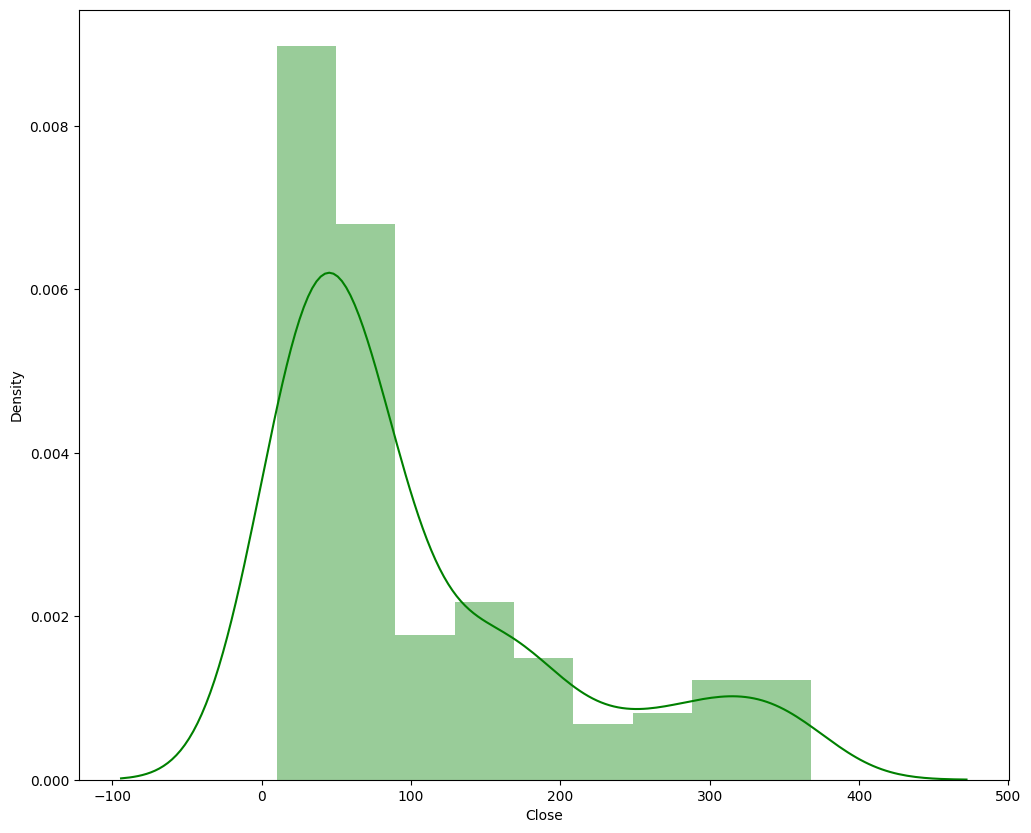

In [19]:
# Chart - 1 visualization code
# Dependent variable 'Price'
plt.figure(figsize=(12,10))
sns.distplot(YBS_df['Close'],color="g")

##### 1. Why did you pick the specific chart?

To depicts the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows the 'Close' column data is possitively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gain insight shows the possitive skewed distribution of the 'Close' column that will help me to understand.

#### Chart - 2

In [20]:
numeric_features = YBS_df.describe().columns

In [21]:
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

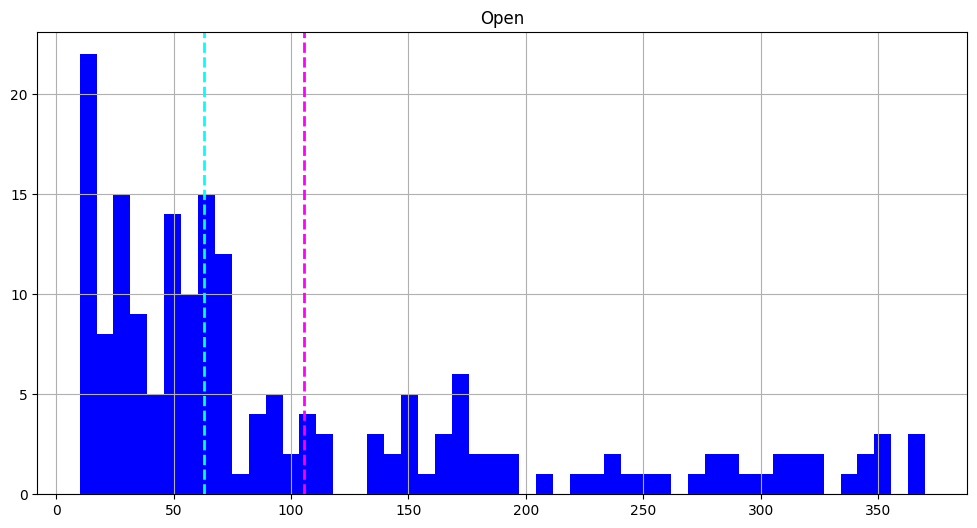

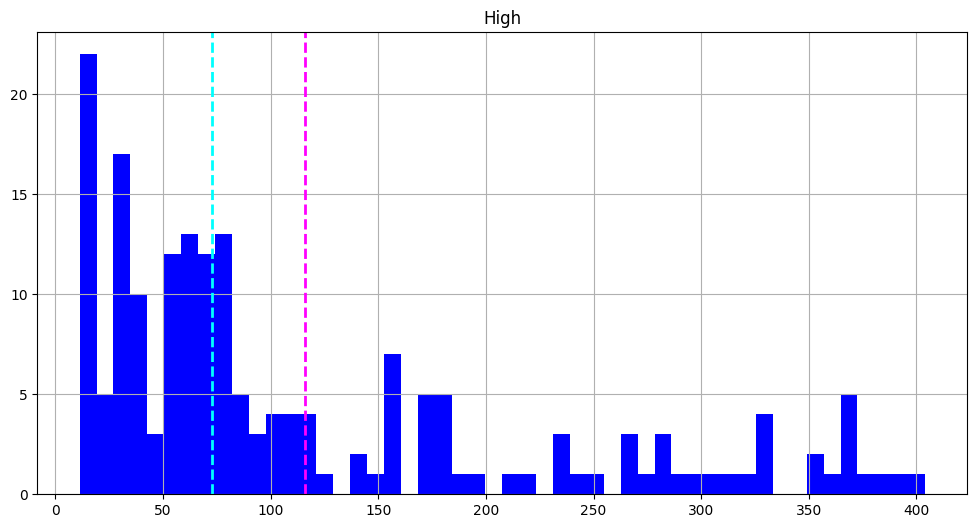

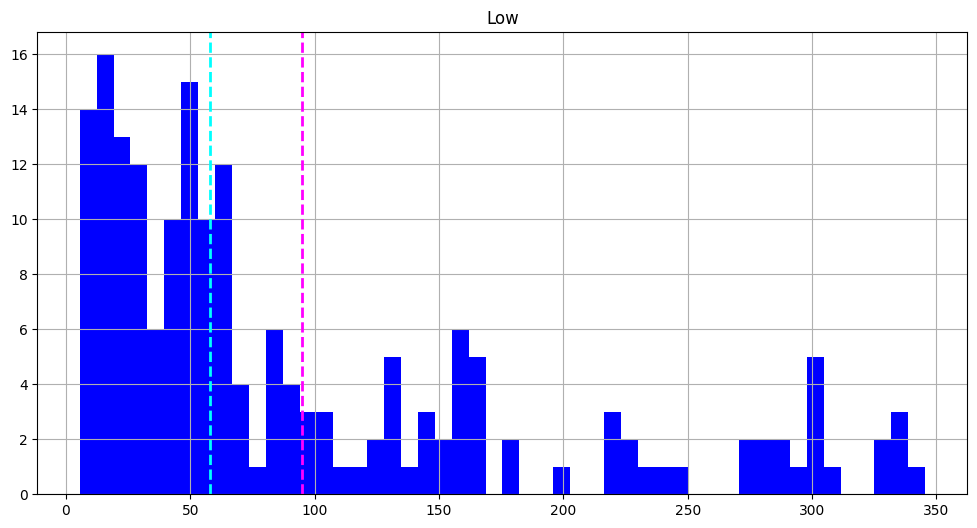

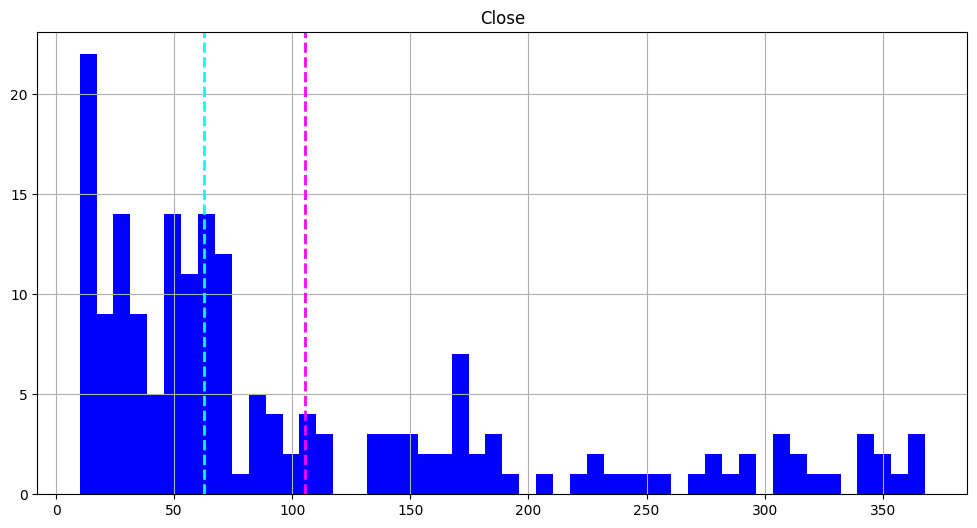

In [22]:
# Chart - 2 visualization code
for col in numeric_features:
  fig= plt.figure(figsize=(12,6))
  ax = fig.gca()
  features = YBS_df[col]
  label= YBS_df['Close']
  features.hist(bins = 50,ax= ax,color='b')
  ax.axvline(features.mean(),color='magenta',linestyle ='dashed',linewidth=2)
  ax.axvline(features.median(),color='cyan',linestyle ='dashed',linewidth=2)
  ax.set_title(col)
  plt.show()

##### 1. Why did you pick the specific chart?

To represent data provided in a form of some groups.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be clearly seen that all the numeric variables are possitively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,the gain insight shows the possitive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 3

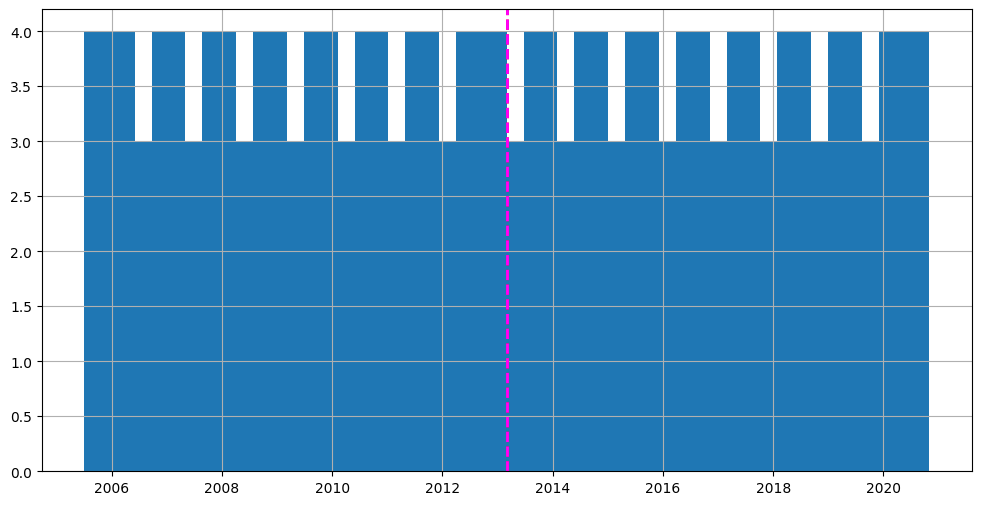

In [23]:
# Chart - 3 visualization code
fig= plt.figure(figsize=(12,6))
ax = fig.gca()
feature = YBS_df['Date']
feature.hist(bins=50, ax=ax)
ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of 'Date' column which is a categorical in the dataset I have used the distplot.

##### 2. What is/are the insight(s) found from the chart?

As the Date column is categorical information and from the distogram plot it is clear that the date column is equally distributed.

#### Chart - 4

**Bivariate Analysis**

In [24]:
# Chart - 4 visualization code
ax=px.line(YBS_df,YBS_df['Date'], YBS_df['Close'], title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'), yaxis=dict(title='Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

To show the relationship between the 'Date' column and closing price.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen that there was consistent overall growth in the stock price till 2014 with some downfalls. But after 2014 the stock price started raise high and from 2016-18 the growth was high and some times the stock price raised to over 350. But in the year of 2020 there was heavy downfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight is showing the overall trends of the stock price throught the year. By just seeing the trend we can have an idea as when to invest for buying yes bank shares.

#### Chart - 5

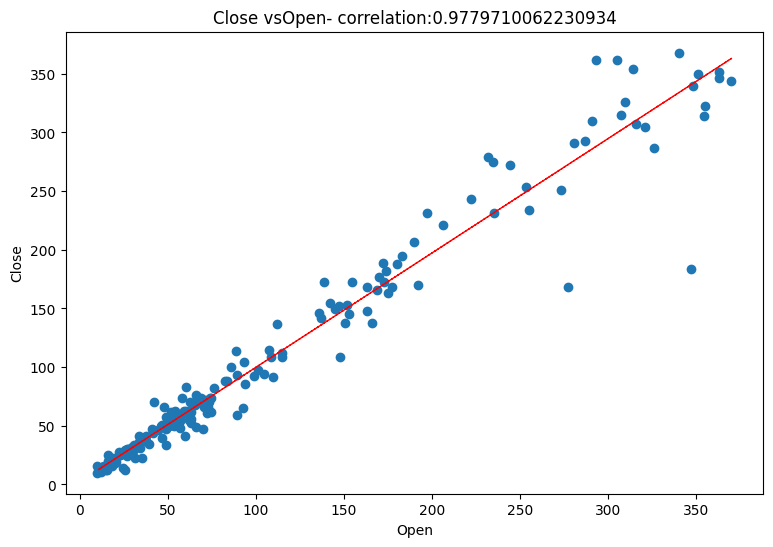

In [25]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = YBS_df['Open']
label = YBS_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs' + 'Open' + '- correlation:' + str(correlation))
z = np.polyfit(YBS_df['Open'], YBS_df['Close'],1)
y_hat = np.poly1d(z)(YBS_df['Open'])

plt.plot(YBS_df['Open'], y_hat,"r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Open and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependent upon the Opening price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Open and price indicates that opening price will also play an important role to have an idea about closing price.

#### Chart - 6

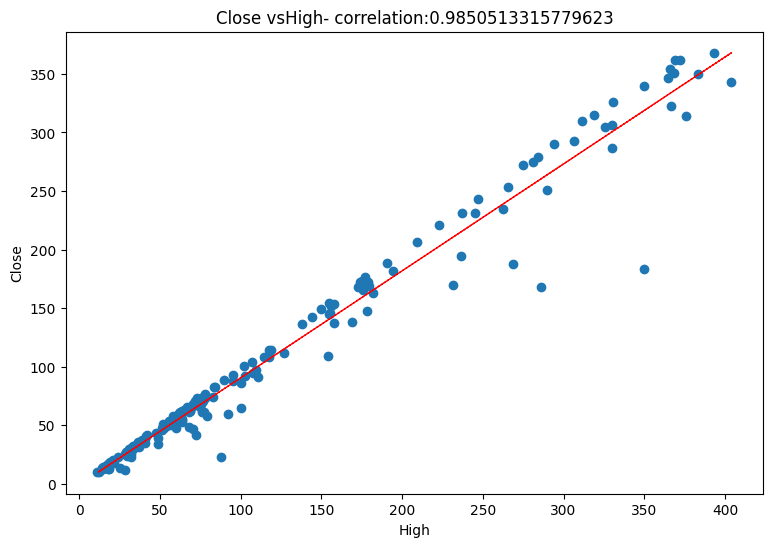

In [26]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = YBS_df['High']
label = YBS_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs' + 'High' + '- correlation:' + str(correlation))
z = np.polyfit(YBS_df['High'], YBS_df['Close'],1)
y_hat = np.poly1d(z)(YBS_df['High'])

plt.plot(YBS_df['High'], y_hat,"r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the High and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is also very much dependent upon the High price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the high and price indicates that high price will also play an important  role to have an idea about closing price.

#### Chart - 7

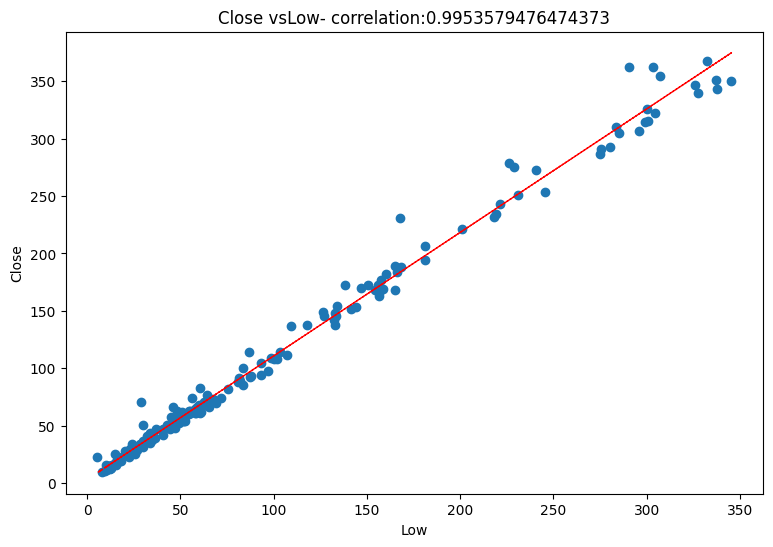

In [27]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = YBS_df['Low']
label = YBS_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs' + 'Low' + '- correlation:' + str(correlation))
z = np.polyfit(YBS_df['Low'], YBS_df['Close'],1)
y_hat = np.poly1d(z)(YBS_df['Low'])

plt.plot(YBS_df['Low'], y_hat,"r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Low and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Low and Close data are Highly correlated therefore we can say that the closing price is also  dependent upon the Low price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the low and price indicates that low price will also play an important  role to have an idea about closing price.

#### Chart - 8- Correlation Heatmap

<Axes: >

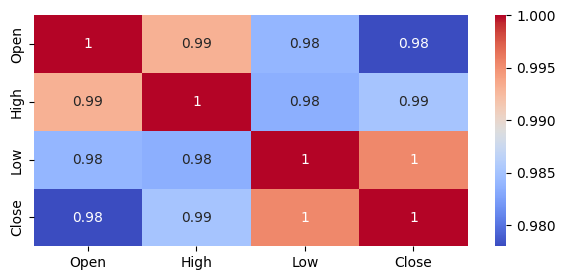

In [28]:
# Chart - 8 Correlation Heatmap visualization code
plt.figure(figsize=(7,3))
sns.heatmap(YBS_df.corr(), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cell indicate the strength of relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that each and every feature is highly correlated to each other.

#### Chart - 9 - Pair Plot

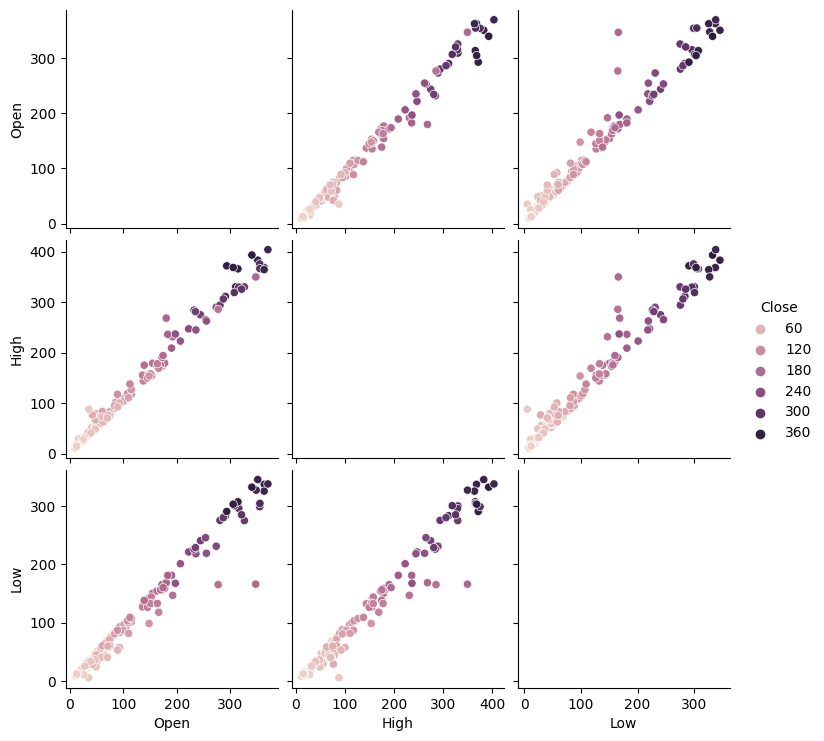

In [29]:
# Chart -Pair plot visualization code
sns.pairplot(YBS_df, hue='Close')

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most seperated clusters. The pair plot visualize the given data to find the relationship between them where the variables can be continous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used Close in the hue variable so the above plot will show the distribution of Close with the different type of columms.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values and null values in the dataset.

### 2. Handling Outliers

In [30]:
# Handling Outliers & Outlier treatments
fig=px.box(YBS_df['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [31]:
fig=px.box(np.log10(YBS_df['Open']),title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [32]:
fig=px.box(YBS_df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [33]:
fig=px.box(np.log10(YBS_df['High']),title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

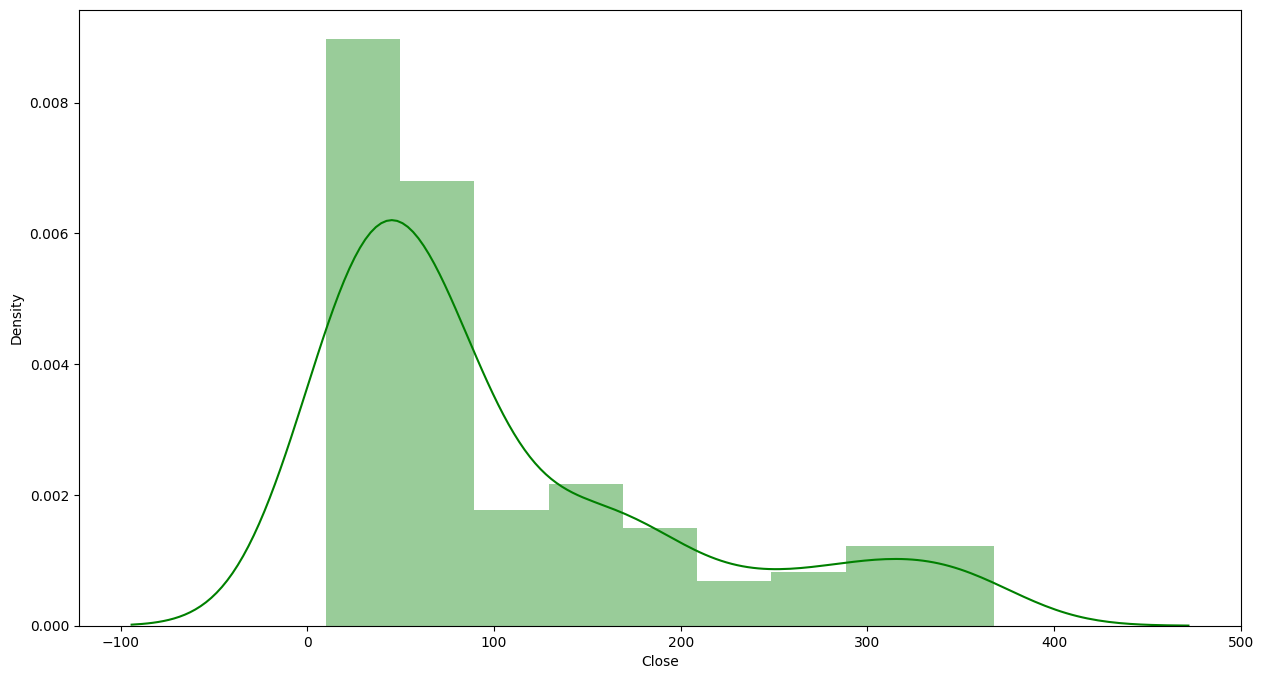

In [34]:
# Dependent variable
plt.figure(figsize=(15,8))
sns.distplot(YBS_df['Close'], color='g')
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

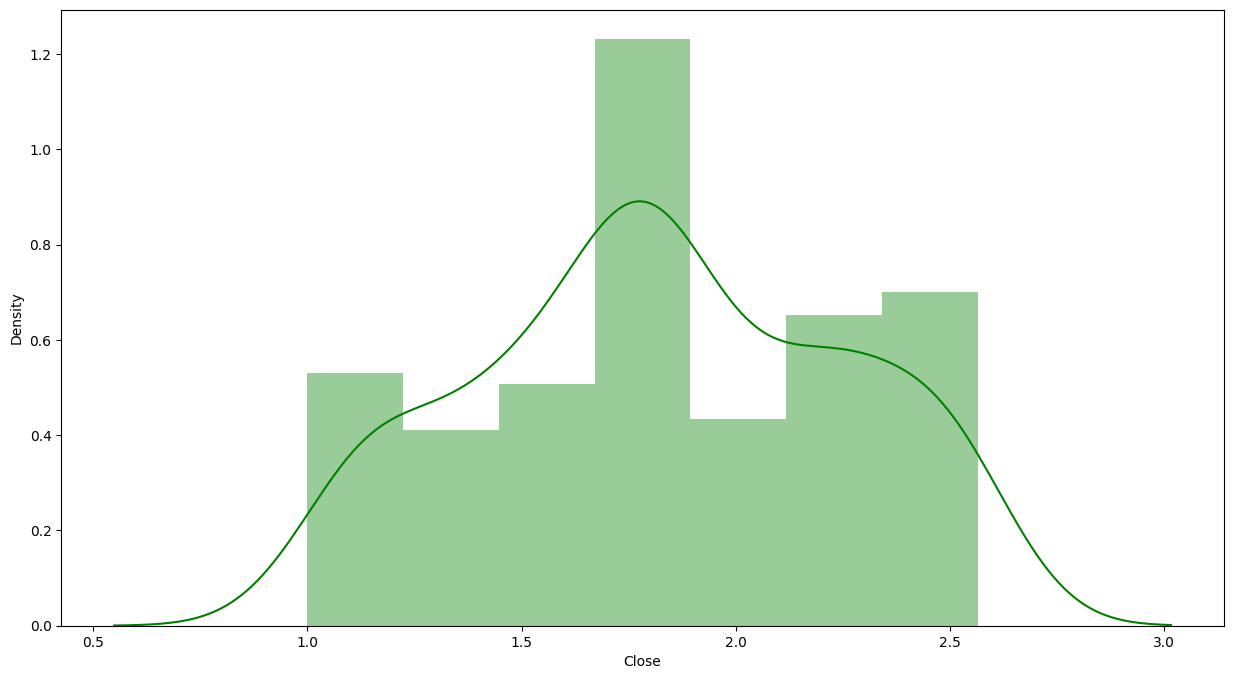

In [35]:
# For normal Distribution
plt.figure(figsize=(15,8))
sns.distplot(np.log10(YBS_df['Close']), color='g')

In [36]:
YBS_df.set_index('Date', inplace=True)

In [37]:
# Generating a new feature to tackle the high multicolinearity,
YBS_df['average']= YBS_df[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [38]:
YBS_df.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


**Independent Variable**

In [39]:
dependent_variable='Close'

In [40]:
independent_variable=list(set(YBS_df.columns.tolist())-{dependent_variable})

In [41]:
x=np.log10(YBS_df[independent_variable]).values
y=np.log10(YBS_df[dependent_variable]).values

<Axes: xlabel='Low', ylabel='Density'>

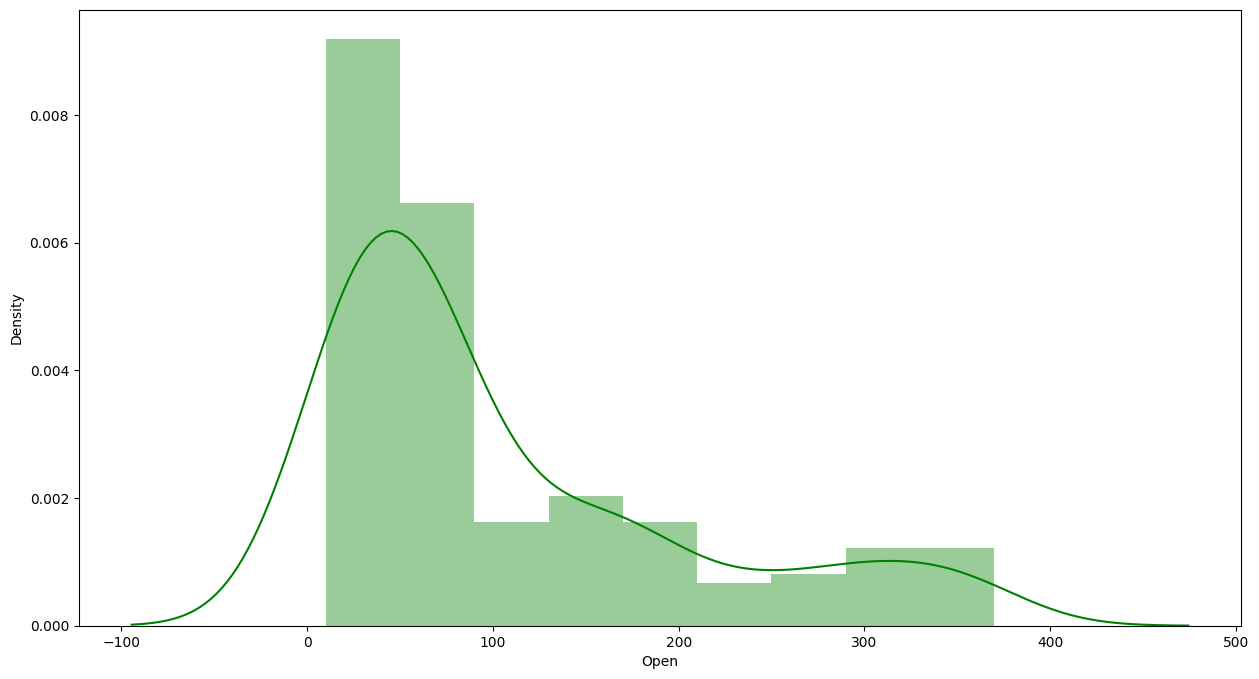

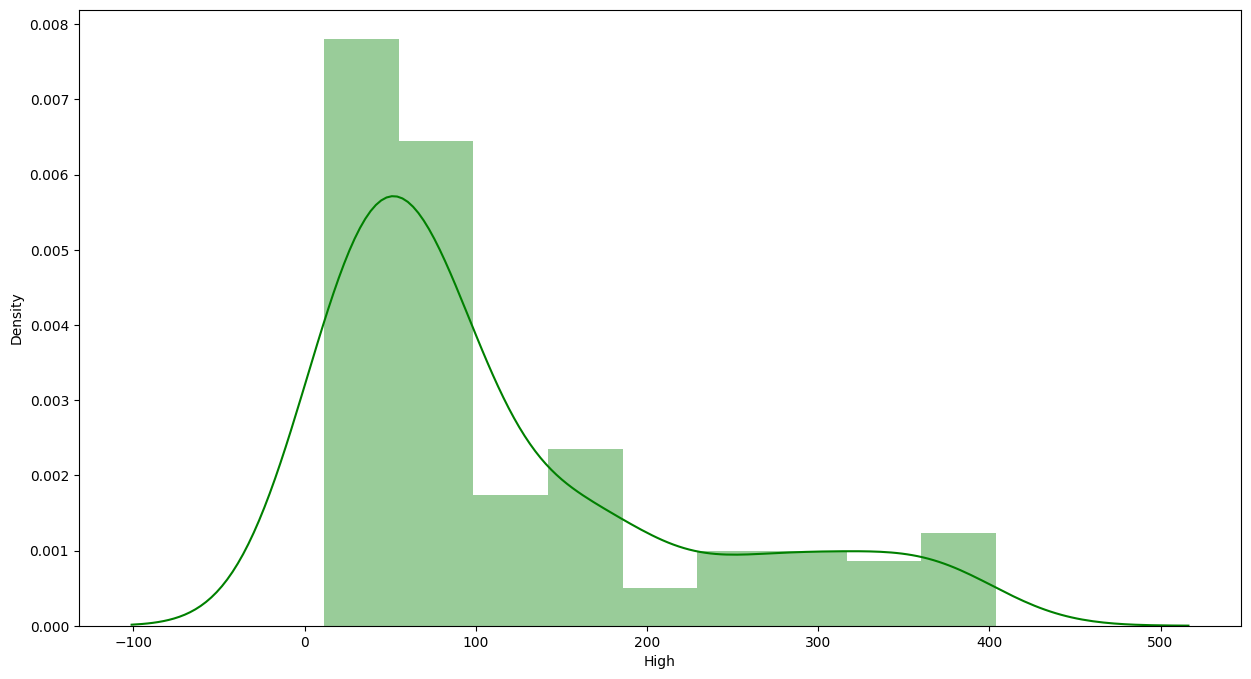

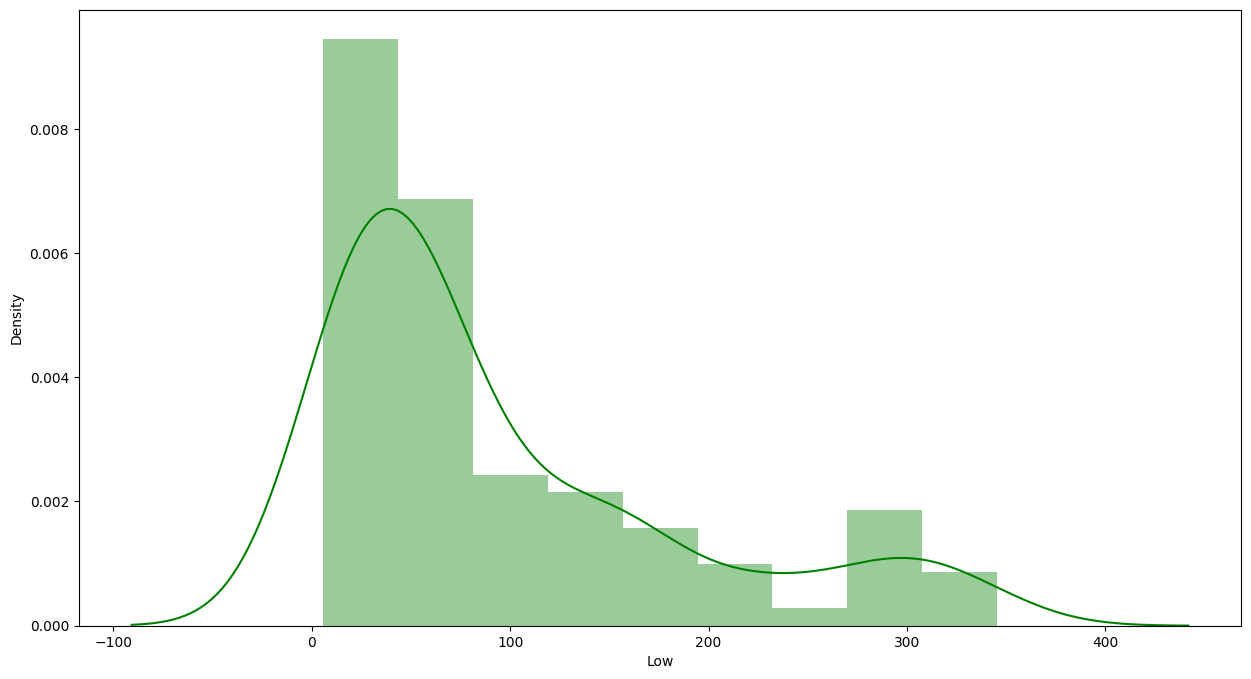

In [42]:
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(YBS_df['Open'], color='g')

plt.figure(figsize=(15,8))
sns.distplot(YBS_df['High'], color='g')

plt.figure(figsize=(15,8))
sns.distplot(YBS_df['Low'], color='g')

<Axes: xlabel='Low', ylabel='Density'>

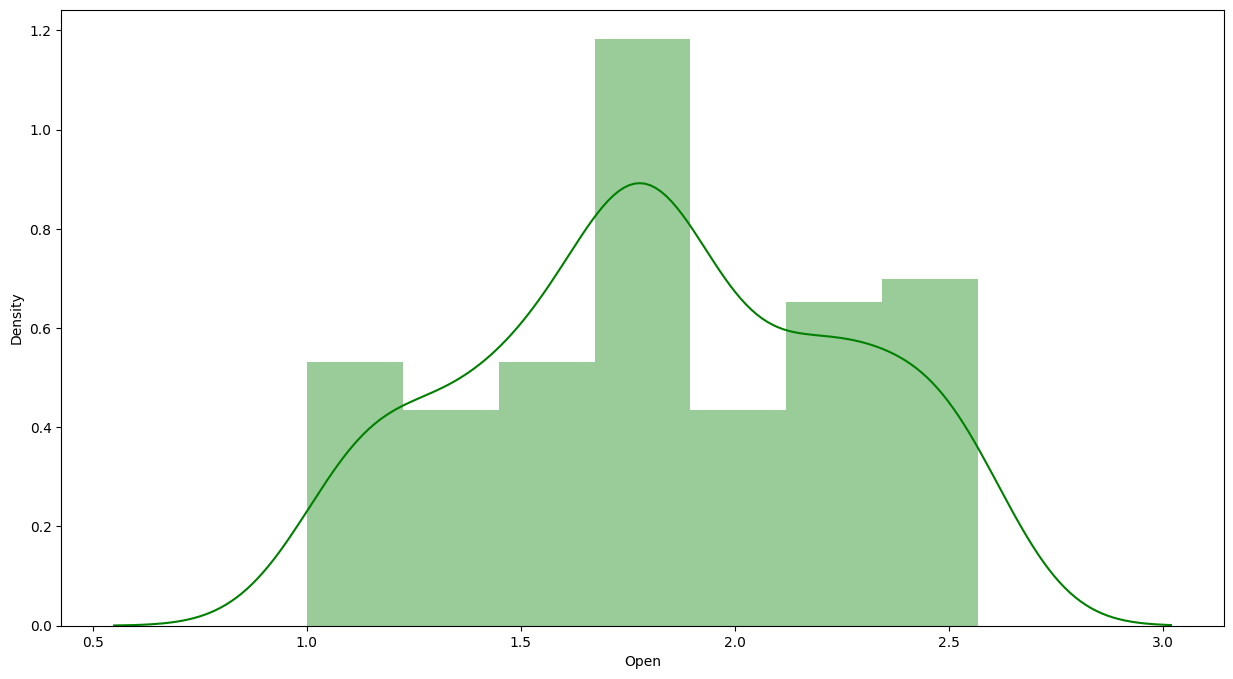

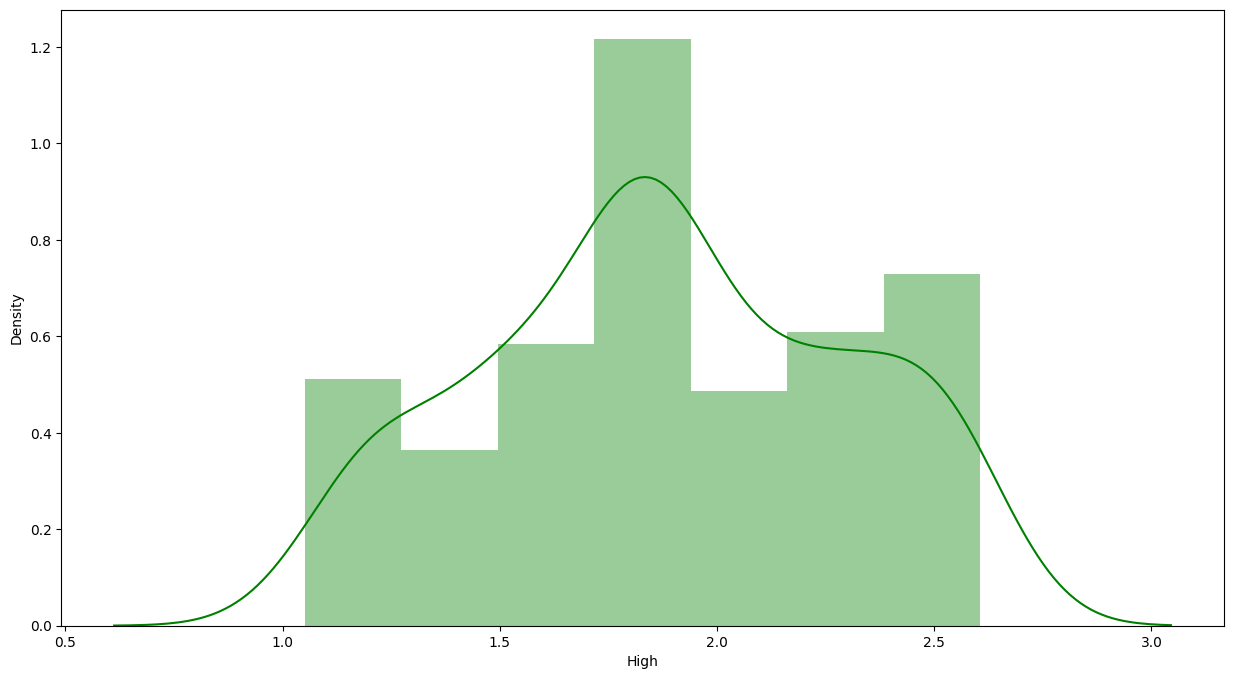

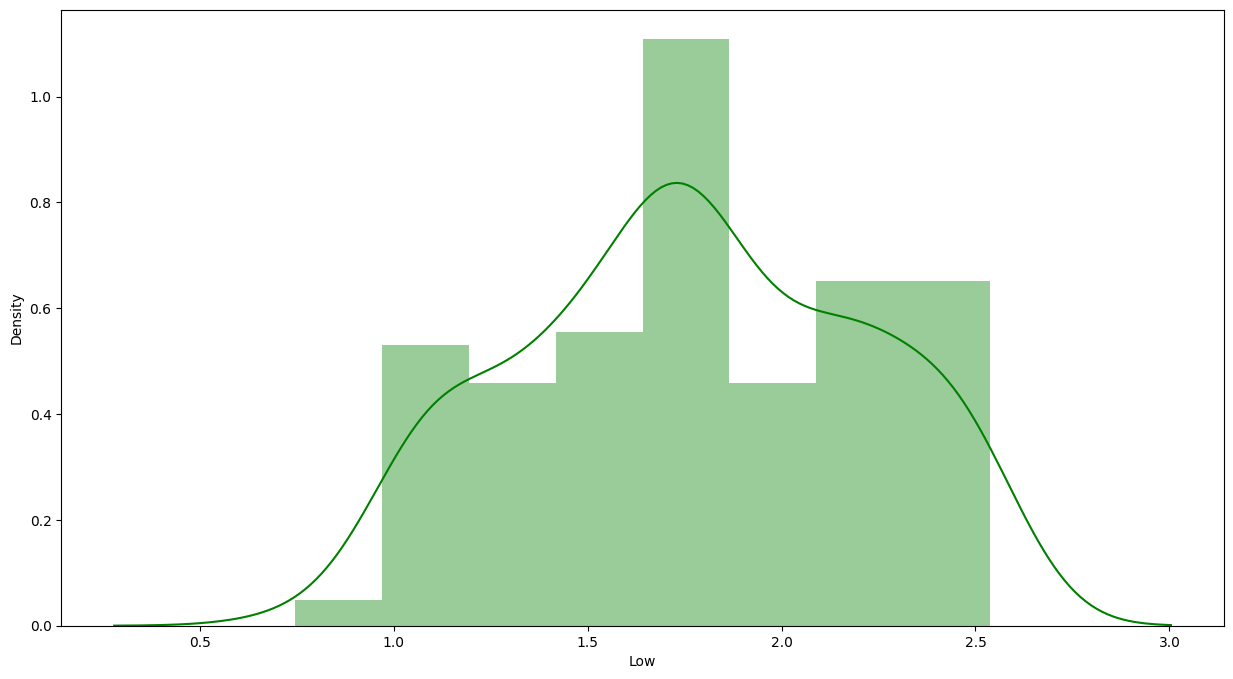

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(np.log10(YBS_df['Open']), color='g')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(YBS_df['High']), color='g')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(YBS_df['Low']), color='g')

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were 3 independent features that had outliers shown in the above boxp lot.So to handle the outliers as well as to tackle the skewness of the datas I have transformed all the numeric features to log base 10 values.
I also have visualized the data through box plot and it shows no outliers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [44]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  # calculating VIF
  vif= pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [45]:
calc_vif(YB_df[[i for i in YB_df.describe().columns]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


<Axes: xlabel='Date'>

<Figure size 1500x800 with 0 Axes>

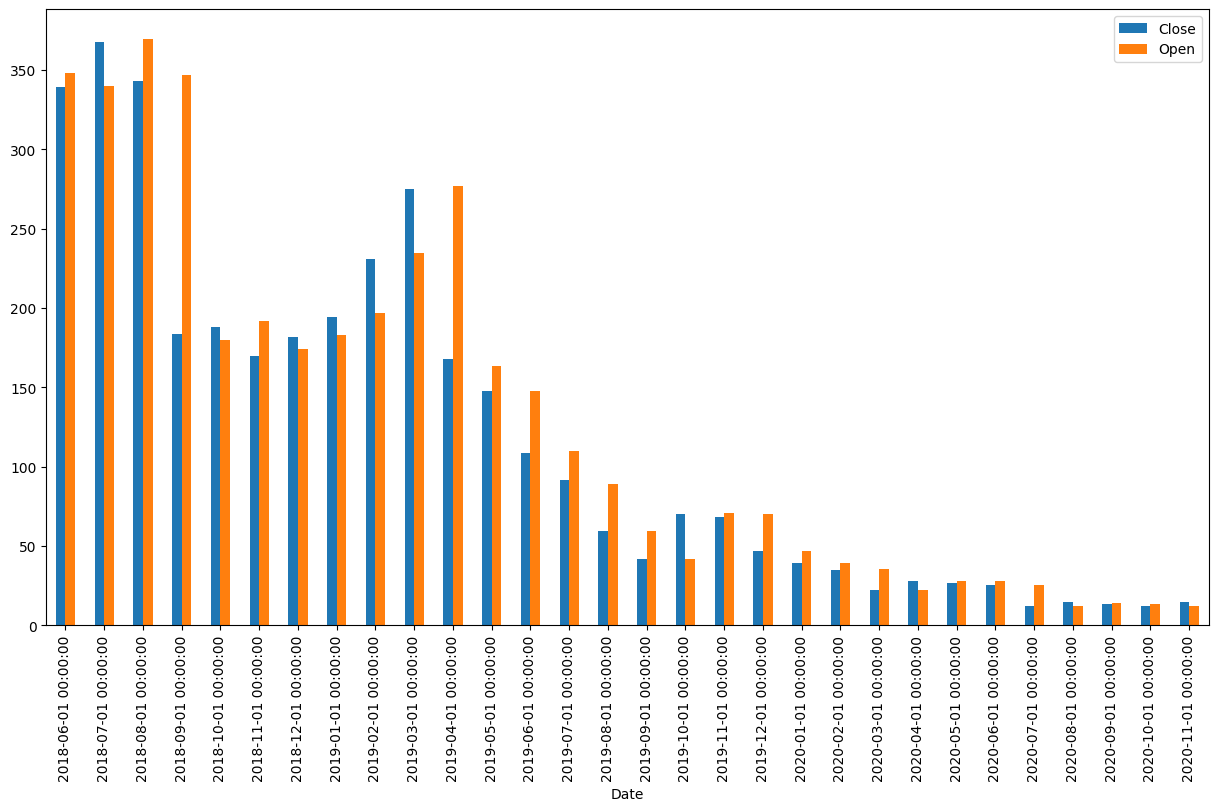

In [46]:
plt.figure(figsize=(15,8))
YBS_df[['Close','Open']].tail(30).plot(kind='bar', figsize=(15,8))

### 5. Data Transformation

In [47]:
# Transform Your data
x=np.log10(YBS_df[independent_variable]).values
y=np.log10(YBS_df[dependent_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, The datas are needed to be transformed.It has been already seen that all the independent variables and target variables are possitive skewed and they also have outliers, so to tackle both the problem I have used log 10 transformation.

### 6. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

##### What data splitting ratio have you used and why?

Here I have used the most common or standard spliting of the dataset which is 80/20.80% of the dataset is to train the algorithm and 20% is for test.

### 7. Data Scaling

In [49]:
# Scaling your data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I have used minmaxscaler method to scale the data since all the independent variables are not normally distributed, so to make sure every independent variables contribute almost equally to the analysis the minmaxscaler method is used.

## ***7. ML Model Implementation***

### ML Model  **1- Linear Regression**

In [50]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the Algorithm
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
reg.score(x_train, y_train)

0.9951721981228238

In [52]:
reg.intercept_

0.9797572199457669

In [53]:
reg.coef_

array([ 0.31613169, -1.46550815,  0.90459122,  1.8295131 ])

In [54]:
y_train_pred= reg.predict(x_train)
#predicting the test results
y_test_pred = reg.predict(x_test)

In [55]:
y_train_pred

array([2.16666583, 1.29226941, 1.82954242, 1.70764376, 1.18120523,
       1.8125145 , 1.71214451, 1.59566436, 1.55910017, 1.15958467,
       1.95752107, 1.14429528, 1.55823795, 1.46869362, 2.50928649,
       1.8695972 , 2.54392622, 1.41033706, 1.6539094 , 1.74612675,
       2.51247873, 1.13452153, 2.03409353, 1.52619683, 2.05652419,
       1.78377774, 2.53135087, 1.82975023, 2.02449454, 2.15802001,
       1.5866463 , 1.97549084, 2.03218456, 2.13046501, 1.19257157,
       1.9839501 , 1.8463336 , 1.1344837 , 1.75275236, 1.90024956,
       2.26106725, 1.02722247, 1.25162797, 2.02085969, 1.73254093,
       1.4555927 , 2.04346852, 2.22522384, 2.11075371, 1.68312785,
       2.57583208, 1.41684846, 1.57800328, 2.18217407, 1.97007091,
       1.80845394, 2.29980869, 1.14999395, 1.82266221, 1.50701132,
       1.44884024, 1.83968301, 1.25401382, 2.46674683, 1.52119224,
       1.15264568, 2.11003104, 1.41435202, 1.35386515, 1.77425201,
       1.88646658, 1.69595399, 1.84210302, 1.74497904, 1.13575

In [56]:
# predicted closing price on the test dataset
y_test_pred

array([1.4923911 , 2.14805936, 1.66188379, 2.14969445, 1.82574095,
       1.50808261, 2.36594461, 1.2267379 , 1.14805807, 2.34435985,
       2.47726939, 1.94425469, 2.18459158, 1.76981107, 2.53179597,
       2.42427508, 1.86780302, 1.44681118, 2.42593087, 1.70693503,
       0.96961156, 2.07433412, 2.17187189, 1.77411331, 2.33861575,
       1.69564443, 2.40140144, 1.13603302, 2.03325749, 1.72217345,
       2.57000081, 2.54424413, 1.86850165, 2.22427412, 1.59443763,
       1.6805872 , 2.41726416])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart
# test performance
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

MSE: 0.0009933850358873517
RMSE: 0.03151801129334387
MAPE: 0.010450049946885302
MAE: 0.01856687016585193
R2: 0.9946673148333343


In [58]:
# train performance
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))

MSE: 0.0008477314841324815
RMSE: 0.0291158287557212
MAPE: 0.01259179320464487
MAE: 0.02047048114658467
R2: 0.9951721981228238


Linear Regression Prediction vs Actual

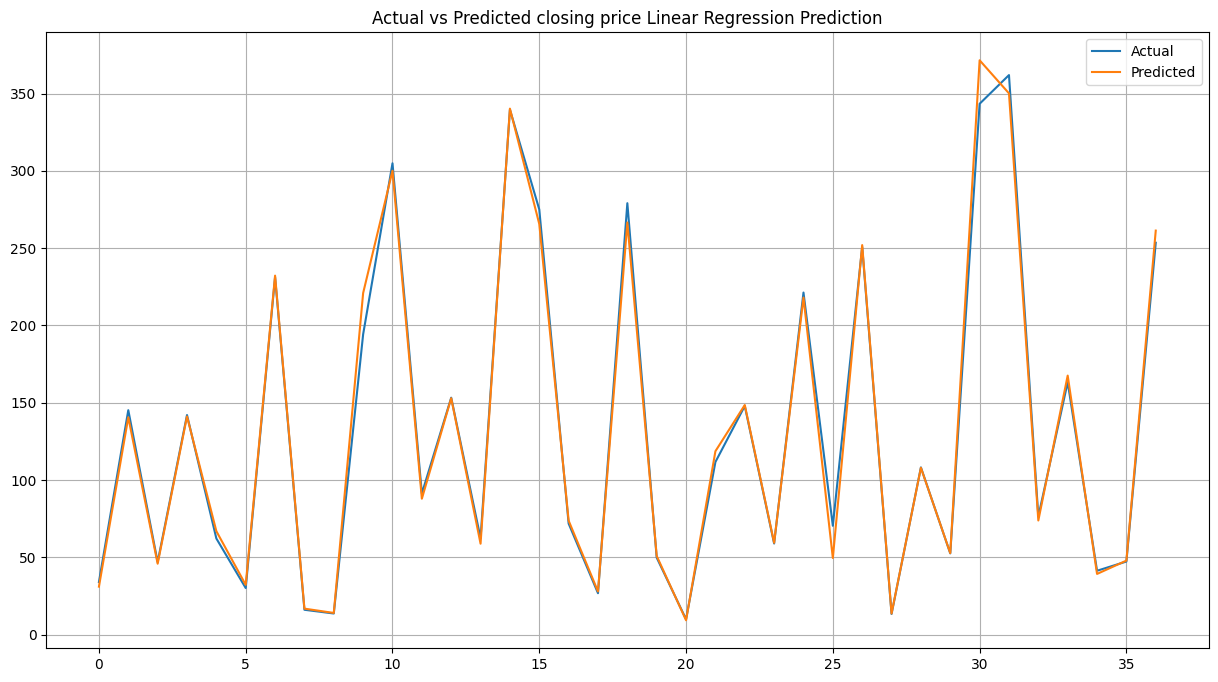

In [59]:
#visualizing the comparison between the actual values and predicted values
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.title('Actual vs Predicted closing price Linear Regression Prediction')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

### ML Model - **2-Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.005, max_iter=3000)
lasso_model = lasso.fit(x_train,y_train)

In [61]:
lasso.score(x_train,y_train)

0.9867942419188855

In [62]:
y_lasso_pred = lasso.predict(x_test)

**Evaluation Matrics**

In [63]:
# Test performance
print("MSE:", mean_squared_error(y_test, y_lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_lasso_pred))
print("MAE:", mean_absolute_error(y_test, y_lasso_pred))
print("R2:", r2_score(y_test, y_lasso_pred))

MSE: 0.0022290665899312137
RMSE: 0.04721299174942437
MAPE: 0.01648201812325959
MAE: 0.030424923633413127
R2: 0.9880339345669544


**Lasso prediction vs Actual**

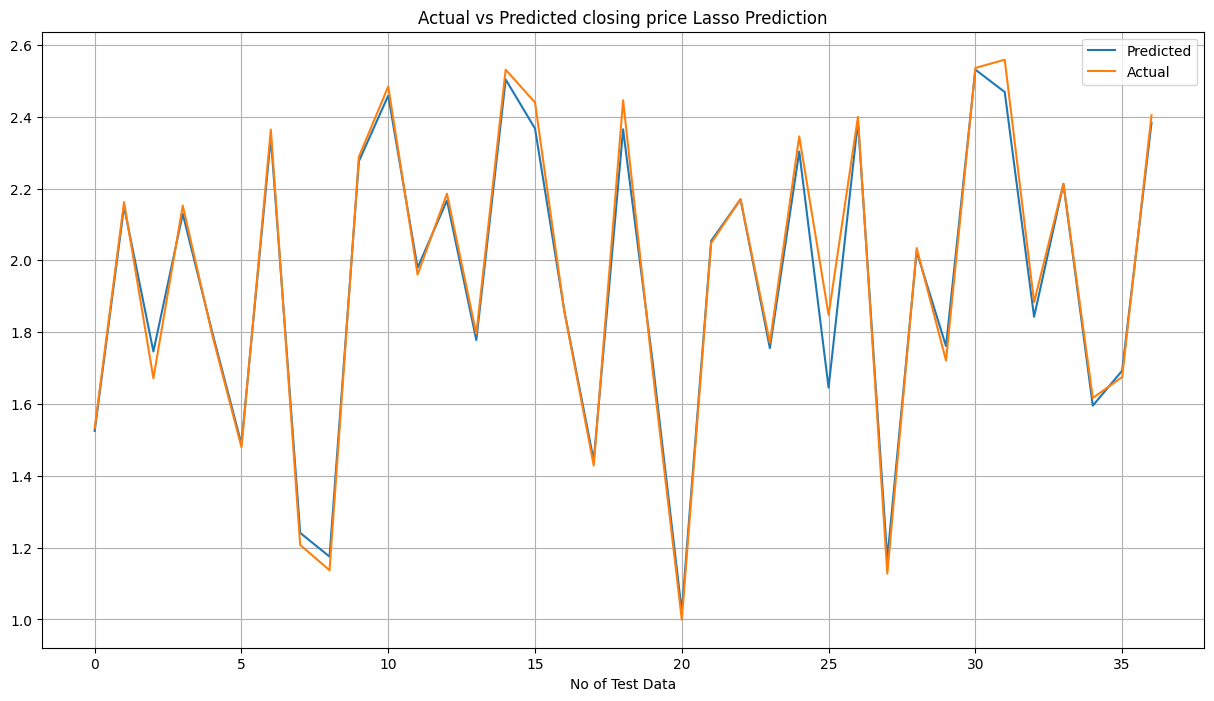

In [64]:
plt.figure(figsize=(15,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted closing price Lasso Prediction')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
# hyper-parameter tuning
lasso_cv= Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0,0.0014]}
lasso_model = GridSearchCV(lasso_cv, parameters, scoring= 'neg_mean_squared_error',cv=3)
# Predict on the model

In [66]:
lasso_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0, 0.0014]},
             scoring='neg_mean_squared_error')

In [67]:
print("The best fit alpha value is found out to be :" , lasso_model.best_params_)
print("\nUsing", lasso_model.best_params_, "the negative mean squared error is:", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using {'alpha': 0.0001} the negative mean squared error is: -0.0013738005666077424


In [68]:
y_pred_lasso = lasso_model.predict(x_test)

**Evaluation Matrics**

In [69]:
# Test performance
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))

MSE: 0.0009472922107942432
RMSE: 0.030778112528130168
MAPE: 0.009802049003230834
MAE: 0.018218641982906337
R2: 0.9949147501336296


**Lasso Prediction vs Actual(After Validification)**

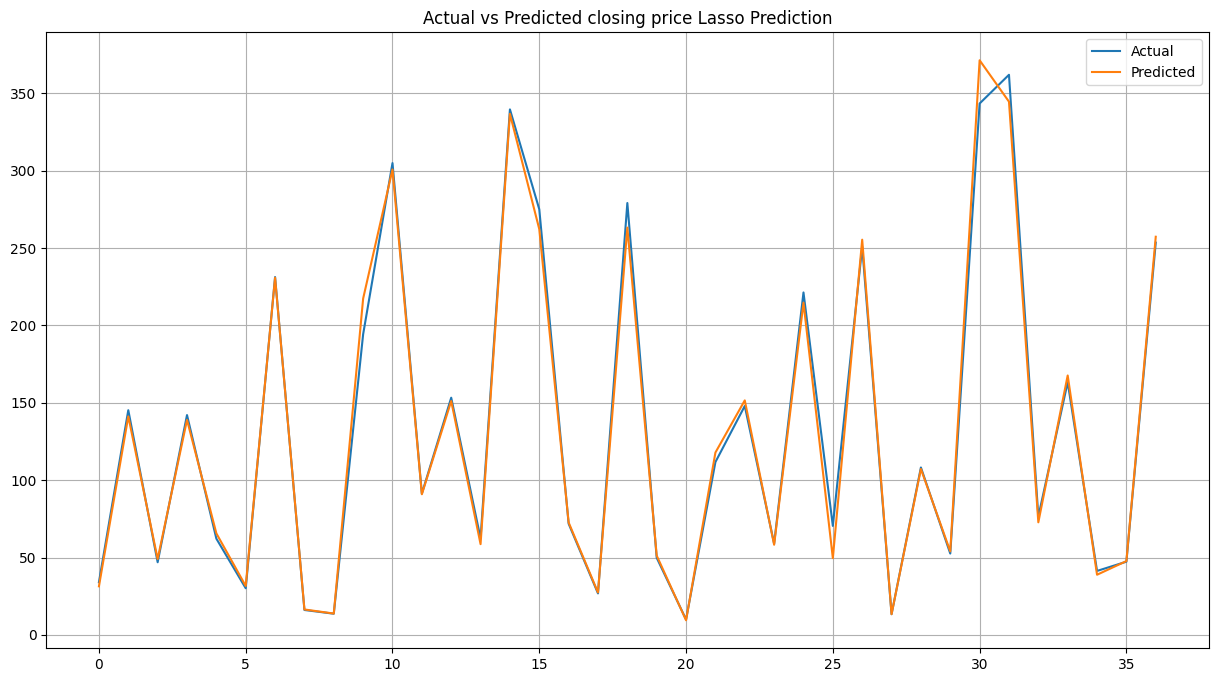

In [70]:
# Lasso plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.title('Actual vs Predicted closing price Lasso Prediction')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

### ML Model - 3 - **Ridge Linear Regression**

In [71]:
# ML Model - 3 Implementation

from sklearn.linear_model import Ridge

In [72]:
# Fit the Algorithm
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [73]:
# Predict on the model
ridge.score(x_train,y_train)

0.9922198746156597

In [74]:
y_ridge_pred = ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
# Test performance

print("MSE:", mean_squared_error(y_test, y_ridge_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_ridge_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_ridge_pred))
print("MAE:", mean_absolute_error(y_test,y_ridge_pred))
print("R2:", r2_score(y_test,y_ridge_pred))

MSE: 0.001341335546206302
RMSE: 0.0366242480633569
MAPE: 0.011130405444973328
MAE: 0.020881755955157927
R2: 0.9927994484390572


**Ridge Prediction vs Actual**

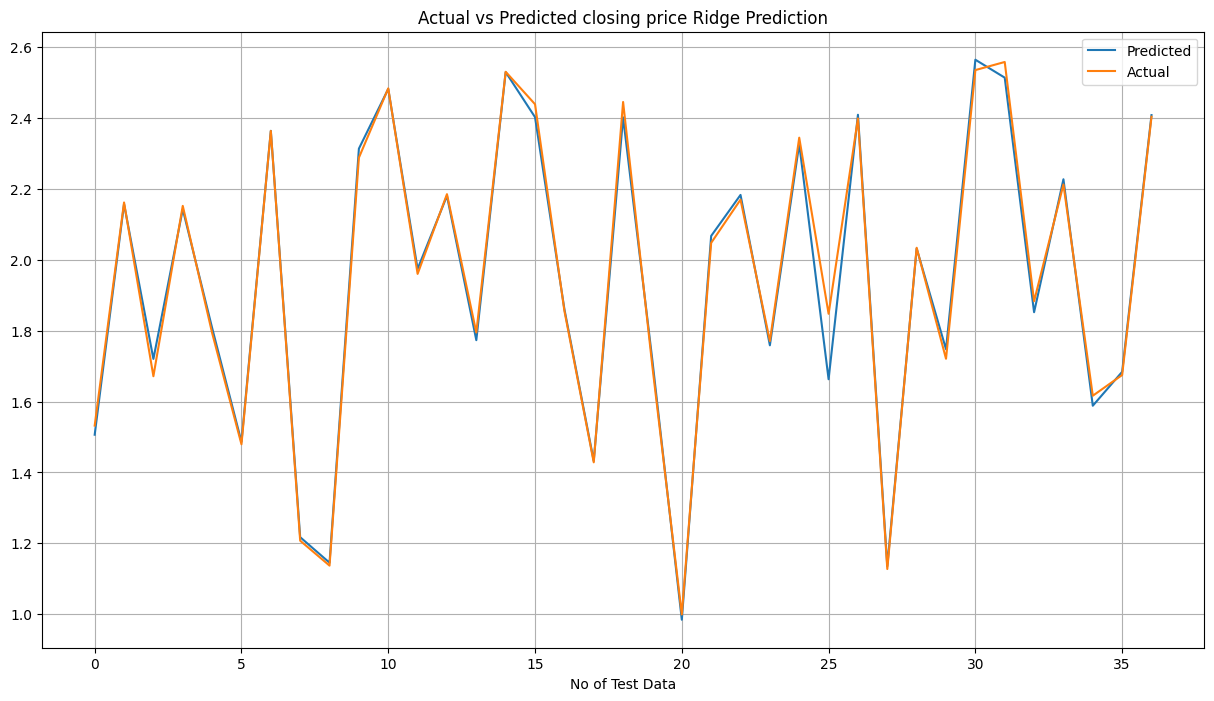

In [76]:
plt.figure(figsize=(15,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted closing price Ridge Prediction')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import RidgeCV
Ridge_cv= Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
Ridge_model = GridSearchCV(Ridge_cv, parameters, scoring= 'neg_mean_squared_error',cv=3)
Ridge_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [78]:
print("The best fit alpha value is found out to be :" , Ridge_model.best_params_)
print("\nUsing", Ridge_model.best_params_, "the negative mean sqquared error is:", Ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using {'alpha': 0.01} the negative mean sqquared error is: -0.0011773450928997643


In [79]:
# Model prediction
y_pred_ridge = Ridge_model.predict(x_test)

**Evaulation Matrics**

In [80]:
# Test Performance
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test,y_pred_ridge))
print("R2:", r2_score(y_test,y_pred_ridge))

MSE: 0.0009336519471625681
RMSE: 0.030555718730911372
MAPE: 0.009807681202919541
MAE: 0.017944123998190464
R2: 0.994987973736674


**Ridge Prediction vs Actual (After Validification)**

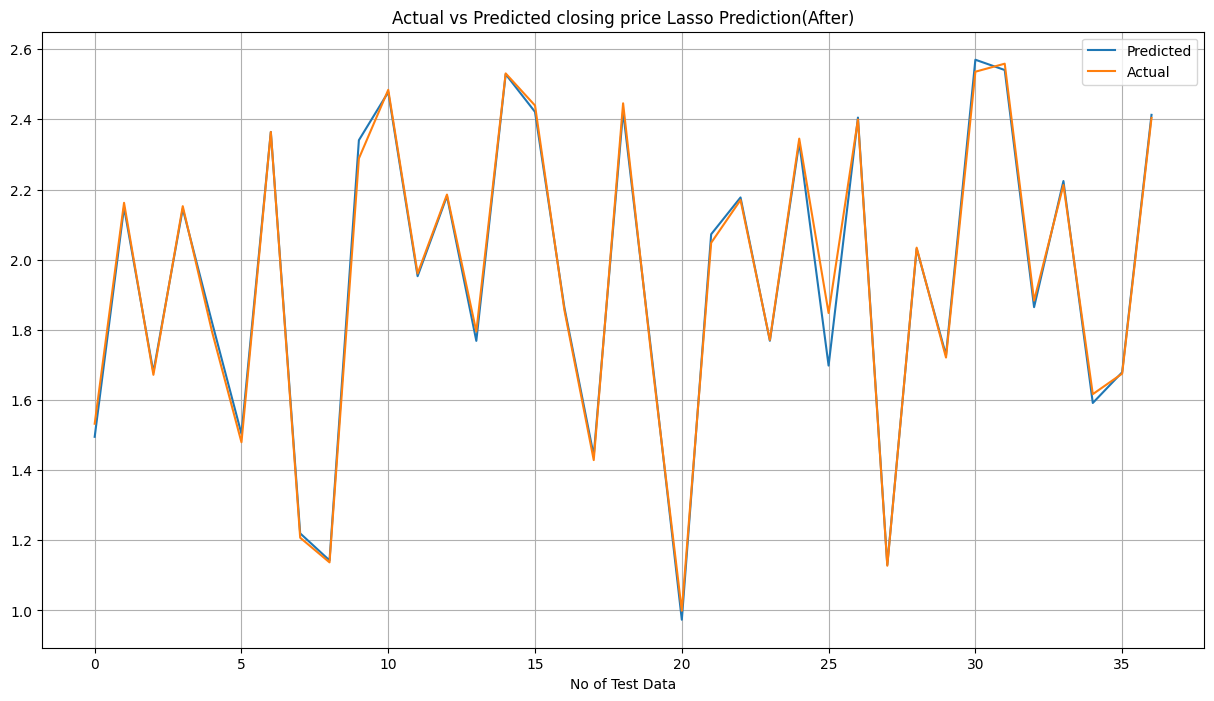

In [81]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted closing price Lasso Prediction(After)')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Elastic Net Linear Regression**

In [82]:
from sklearn.linear_model import ElasticNet

In [83]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [84]:
y_elastic_pred = elastic.predict(x_test)

**Evaluation Matrics**

In [85]:
# Test Performance
print("MSE:", mean_squared_error(y_test, y_elastic_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_elastic_pred))
print("MAE:", mean_absolute_error(y_test, y_elastic_pred))
print("R2:", r2_score(y_test, y_elastic_pred))

MSE: 0.06104320390155368
RMSE: 0.24706922896539277
MAPE: 0.11295089848211882
MAE: 0.2081540674059836
R2: 0.6723081421487394


**ElasticNet Prediction vs Actual**

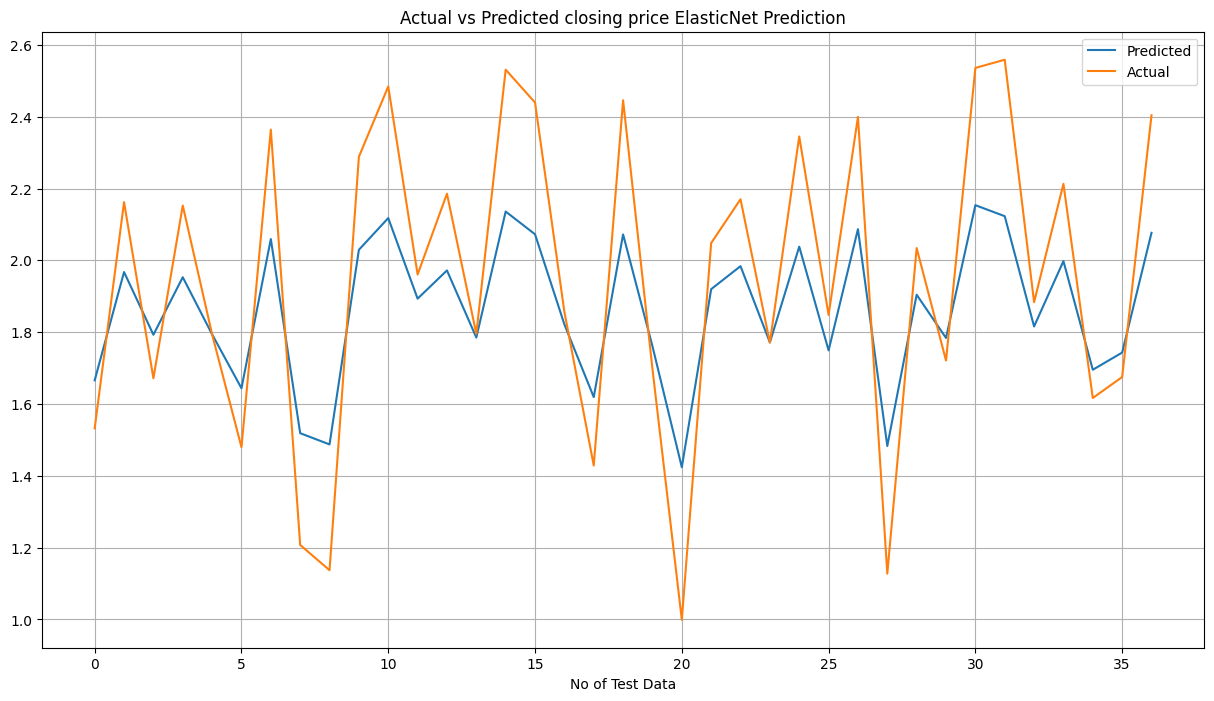

In [86]:
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted closing price ElasticNet Prediction')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Cross validation**

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
elastic_cv = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv, parameters, scoring = 'neg_mean_squared_error', cv=3)
elastic_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [89]:
print("The best fit alpha value is found out to be:", elastic_model.best_params_)
print("\nUsing", elastic_model.best_params_, "the negative mean squared error is:", elastic_model.best_score_ )

The best fit alpha value is found out to be: {'alpha': 0.0001, 'l1_ratio': 0.3}

Using {'alpha': 0.0001, 'l1_ratio': 0.3} the negative mean squared error is: -0.0012627528840587576


In [90]:
y_pred_elastic= elastic_model.predict(x_test)

**Evaluation Matrics**

In [91]:
# Test Performance
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_elastic))
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))
print("R2:", r2_score(y_test, y_pred_elastic))

MSE: 0.0009582694937164723
RMSE: 0.03095592824834158
MAPE: 0.009879253107888673
MAE: 0.018192806687971224
R2: 0.9948558219318802


**ElasticNet Prediction vs Actual (After Validification)**

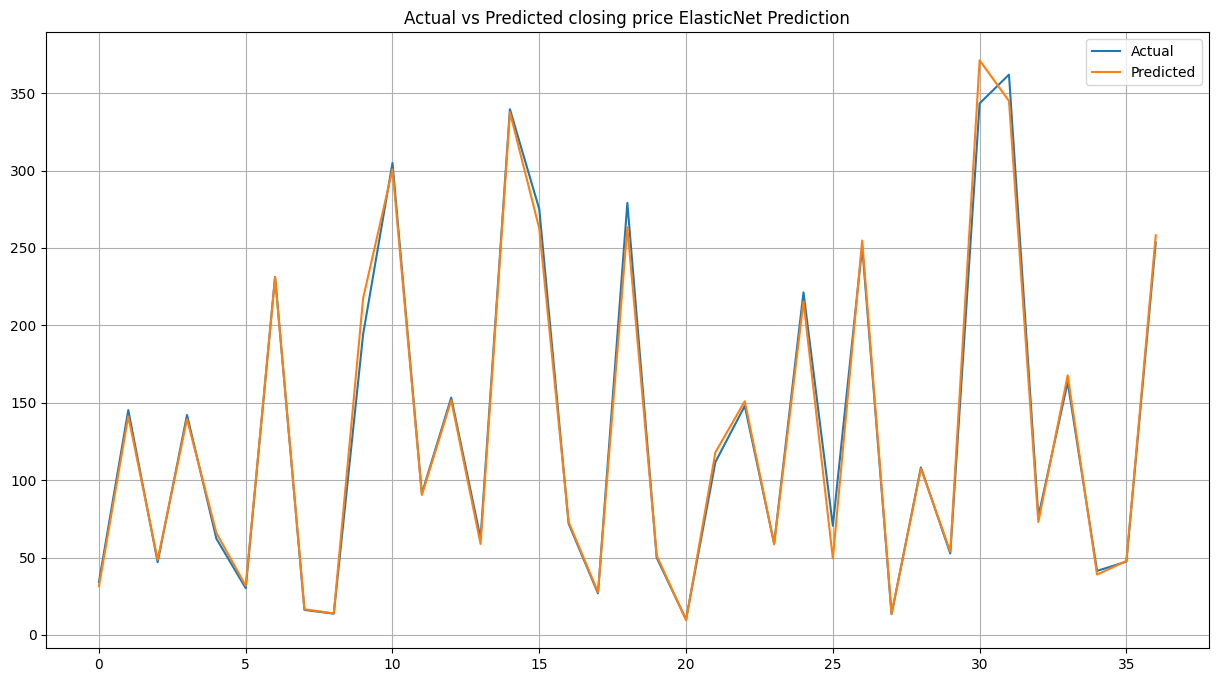

In [92]:
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted closing price ElasticNet Prediction')
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here for all the models I have used Grid search cross validation technique since I have already the Hyper parameter numbers and also the search space that is the dataset is very small, so according to me GridSearchCV would be the best choice to tune the Hyper parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after using GridSearchCV for each model the performance is improved, e.g, for Lasso regression one of the evaluation matrics the mean absolute percentage error before cross validation is MAPE:0.016482033430020977 but after using cross validation the same evaluation matrix for the test data became MAPE:0.00978880604015414. Therefore it can be established that after using cross validation the performance was improved.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since this problem is related to regression so I would choose the root mean square error evaluation metrics for possitive business impact. The root mean square error not only measures the difference between the actual and predicted values, it also indicates the effect of large errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all the above models for Lasso and Elasticnet regression the evaluation metrices for test dataset are almost close to each other. So as per my understanding we can use elasticnet regressor for now. However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that tha algorithms get more training data to learn more and improve their accuracy.

# **Conclusion**

* The dataset does not have any null values/missing values as well as duplicate values which made the analysis easy and smooth.
* I started with univariate analysis in which it can be seen that all the variables were possitively skewed.
* In the section of bivariate analysis it can be seen that all the independent variables are having linear relationship with the target variable.
* While analysing the close price with date it can be seen that there was huge fall in the stock prices after year 2018.
* In the correlation  heatmap chart it can be clearly seen that all the variables are highly correlated to each other which is a problem for linear regression.
* In the box plot section it can be seen that the independent variables are having some outliers.
* Also the date column was formated to year-month-date-format.
* To tackle the outliers, skewness and multicolinearity problem tha data was transformed to log10 value and a new feature as average which is the mean of the prices for each row was generated.
* At last I have tried to implement 5 models in order to predict the closing stock prices and finally found that Elasticnet regression model is the best performing model since it has better r2 score value as well as other evaluation metrics values.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***